<a href="https://colab.research.google.com/github/Marglodis/challenge_telecomX_parte_2/blob/main/challenge_telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests


In [252]:
url_data = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

df_original = pd.read_json(url_data)

In [253]:
data_cleaned = pd.read_csv('/content/df_clean.csv') # data limpia del challenge anterior
data_cleaned.info()
data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [254]:
from sklearn.preprocessing import LabelEncoder

# Mapear Churn a binario
data_cleaned['Churn'] = LabelEncoder().fit_transform(data_cleaned['Churn'])  # Yes -> 1, No -> 0

# Codificar variables binarias
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    data_cleaned[col] = LabelEncoder().fit_transform(data_cleaned[col])  # e.g., Female -> 0, Male -> 1

# One-hot encoding para variables multicategoría
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']
df = pd.get_dummies(data_cleaned, columns=multi_cols, drop_first=True)

In [255]:
# Antes de modelar debes saber cuántos churners hay. Si la clase positiva es muy pequeña (ej. <10%), aplica técnicas de balanceo o ajustar métricas.

print(data_cleaned['Churn'].value_counts(dropna=False))
print(data_cleaned['Churn'].value_counts(normalize=True)) # Proporción normalizada

Churn
0    5398
1    1869
Name: count, dtype: int64
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


In [256]:
# Quitar columnas irrelevantes (IDs) y transformar target
#  IDs no aportan señal y favorecen overfitting. Target debe ser 0/1 para clasificación.
to_drop = ['customerID'] if 'customerID' in data_cleaned.columns else []
data_cleaned.drop(columns=to_drop, inplace=True)

# target binario
# data_cleaned['Churn'] = data_cleaned['Churn'].map({'Yes': 1, 'No': 0})

In [257]:
from sklearn.preprocessing import LabelEncoder

# Mapear Churn a binario
data_cleaned['Churn'] = LabelEncoder().fit_transform(data_cleaned['Churn'])  # Yes -> 1, No -> 0

# Codificar variables binarias
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    data_cleaned[col] = LabelEncoder().fit_transform(data_cleaned[col])  # e.g., Female -> 0, Male -> 1

# One-hot encoding para variables multicategoría
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']
df = pd.get_dummies(data_cleaned, columns=multi_cols, drop_first=True)

In [258]:
data_cleaned.info()
data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0,0,0,1,1,9,1,No,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,Yes,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,No,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,No,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,No,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [259]:
print(data_cleaned['InternetService'].unique())
print(data_cleaned['MultipleLines'].unique())
print(data_cleaned['Contract'].unique())


['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No phone service']
['One year' 'Month-to-month' 'Two year']


In [260]:
mapeos_binarios = {
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0,
    'No phone service': 0,
    'No internet service': 0
}

# Aplicar el mapeo a las columnas deseadas
data_cleaned['PhoneService'] = data_cleaned['PhoneService'].replace(mapeos_binarios)
data_cleaned['InternetService'] = data_cleaned['InternetService'].replace(mapeos_binarios)

In [261]:
# 1) Contar cantidad de servicios activos (si tienes columnas tipo 'PhoneService','InternetService', etc.) PhoneService	MultipleLines	InternetService	OnlineSecurity	DeviceProtection	TechSupport	StreamingTV	StreamingMovies
service_cols = [c for c in data_cleaned.columns if c in ['MultipleLines', 'InternetService']]
service_cols = [c for c in service_cols if c in data_cleaned.columns]
data_cleaned['n_services'] = data_cleaned[service_cols].apply(lambda row: sum(row== 'Yes'), axis=1)  # adaptar mapping si es 1/0

# 2) Crear buckets de tenure
data_cleaned['tenure_bucket'] = pd.cut(data_cleaned['tenure'], bins=[0,6,12,24,48,72,100], labels=['0-6','7-12','13-24','25-48','49-72','73+'])


In [262]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7267 non-null   int64   
 1   gender            7267 non-null   int64   
 2   SeniorCitizen     7267 non-null   int64   
 3   Partner           7267 non-null   int64   
 4   Dependents        7267 non-null   int64   
 5   tenure            7267 non-null   int64   
 6   PhoneService      7267 non-null   int64   
 7   MultipleLines     7267 non-null   object  
 8   InternetService   7267 non-null   object  
 9   OnlineSecurity    7267 non-null   int64   
 10  OnlineBackup      7267 non-null   int64   
 11  DeviceProtection  7267 non-null   int64   
 12  TechSupport       7267 non-null   int64   
 13  StreamingTV       7267 non-null   int64   
 14  StreamingMovies   7267 non-null   int64   
 15  Contract          7267 non-null   object  
 16  PaperlessBilling  7267 n

Proporción de Churn:
 Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64


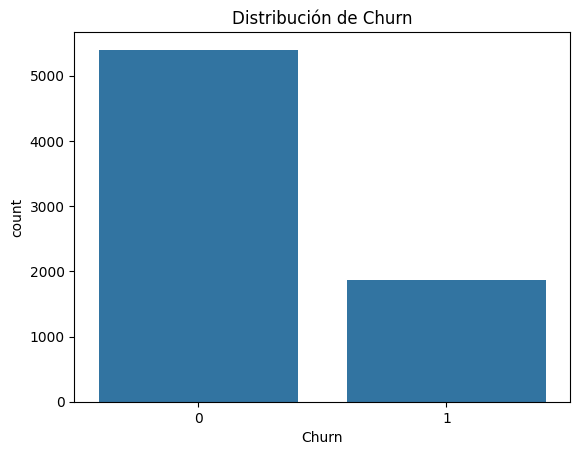

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_rate = data_cleaned['Churn'].value_counts(normalize=True) * 100
print("Proporción de Churn:\n", churn_rate)

sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

In [264]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# El desbalanceo (~27% churn) puede hacer que los modelos ignoren la clase minoritaria,
# reduciendo su capacidad de predecir churns (crítico para retención).
# SMOTE genera muestras sintéticas de la clase minoritaria basadas en k-vecinos,
# equilibrando clases sin introducir bias de duplicación.
# Aplicarlo solo en entrenamiento evita data leakage y mejora generalización.

X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir datos (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Distribución después de SMOTE:\n", pd.Series(y_train_res).value_counts())

Distribución después de SMOTE:
 Churn
0    3749
1    3749
Name: count, dtype: int64


In [265]:
from sklearn.preprocessing import StandardScaler

# Modelos como Logistic Regression, SVM o KNN dependen de distancias o gradientes,
# por lo que variables con escalas diferentes (e.g., 'tenure' 0-72 vs 'MonthlyCharges' 18-118)
# pueden dominar injustamente. Estandarización (media=0, std=1) asegura contribuciones equitativas.
# Modelos basados en árboles (e.g., Random Forest) no requieren esto, pero estandarizamos para compatibilidad con múltiples algoritmos.

scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']
X_train_res[numerical_cols] = scaler.fit_transform(X_train_res[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Análisis de Correlación

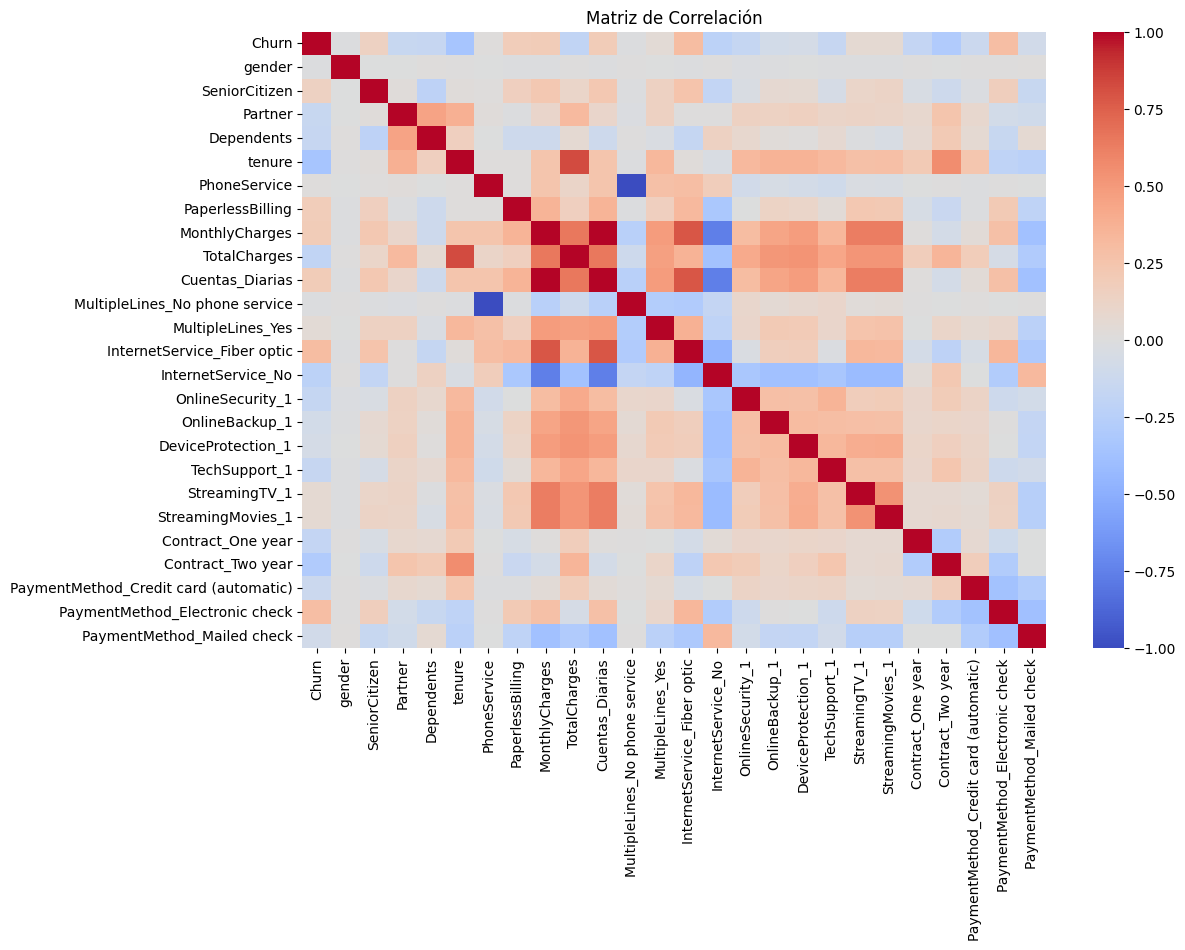

Correlaciones con Churn:
 Churn                             1.000000
tenure                            0.344079
InternetService_Fiber optic       0.300949
Contract_Two year                 0.295138
PaymentMethod_Electronic check    0.294626
InternetService_No                0.224051
TotalCharges                      0.193345
Cuentas_Diarias                   0.189866
MonthlyCharges                    0.189866
PaperlessBilling                  0.186666
Name: Churn, dtype: float64


In [266]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Correlaciones con Churn
churn_corr = corr_matrix['Churn'].abs().sort_values(ascending=False).head(10)
print("Correlaciones con Churn:\n", churn_corr)

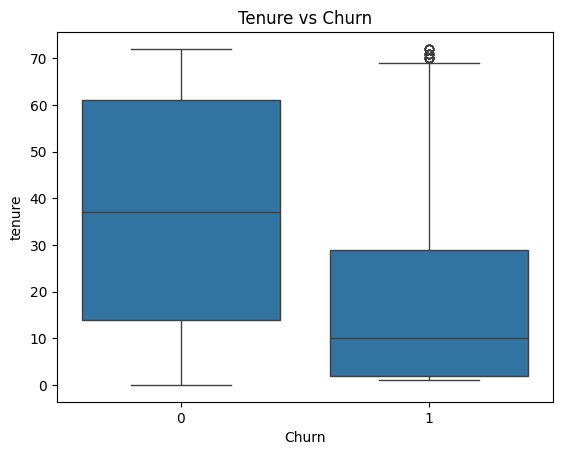

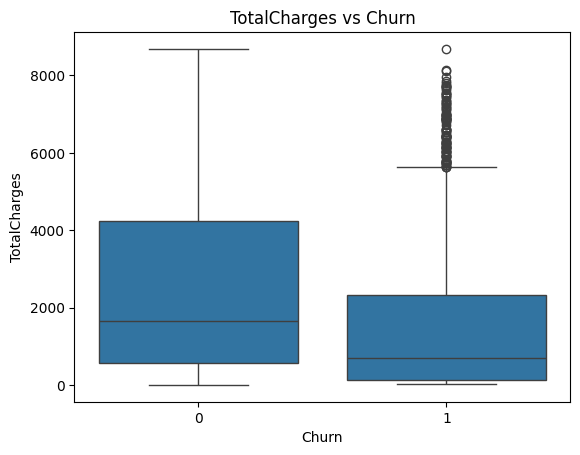

Churn                     0         1
Contract_One year                    
False              0.703723  0.296277
True               0.890718  0.109282


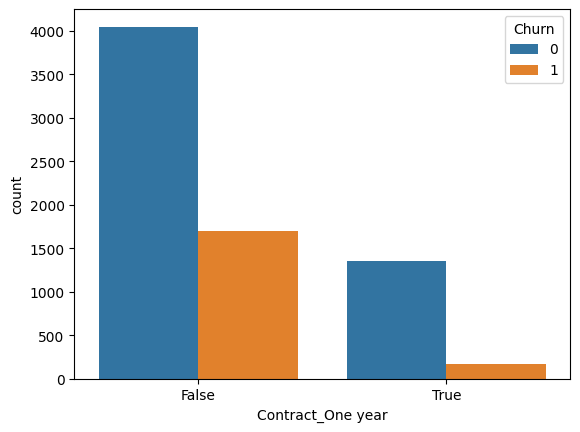

In [267]:
# Boxplot para tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

# Boxplot para TotalCharges vs Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges vs Churn')
plt.show()

# Crosstab para Contract vs Churn
print(pd.crosstab(df['Contract_One year'], df['Churn'], normalize='index'))
sns.countplot(x='Contract_One year', hue='Churn', data=df)
plt.show()

# Modelado Predictivo: Separación de Datos y Entrenamiento

In [268]:
# Dividir datos en entrenamiento/prueba (70/30). Entrenar Logistic Regression (baseline) y Random Forest (ensemble robusto).
# La división 70/30 asegura evaluación en datos no vistos, previniendo overfitting.
# Logistic Regression es interpretable y sirve como baseline; Random Forest captura no-linealidades y
# es robusto para datasets con categóricas como este. Ambos son comunes en benchmarks de Kaggle para este dataset.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

# Evaluación de los Modelos


Logistic Regression Metrics:
Accuracy: 0.7730398899587345
Precision: 0.5289514866979655
Recall: 0.6353383458646616
F1-Score: 0.5772843723313408


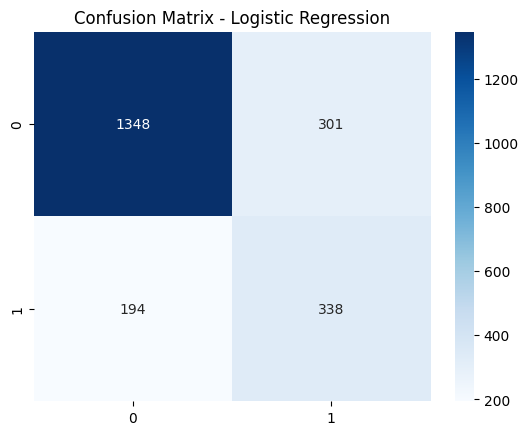


Random Forest Metrics:
Accuracy: 0.7877120586886749
Precision: 0.5619389587073609
Recall: 0.5883458646616542
F1-Score: 0.5748393021120294


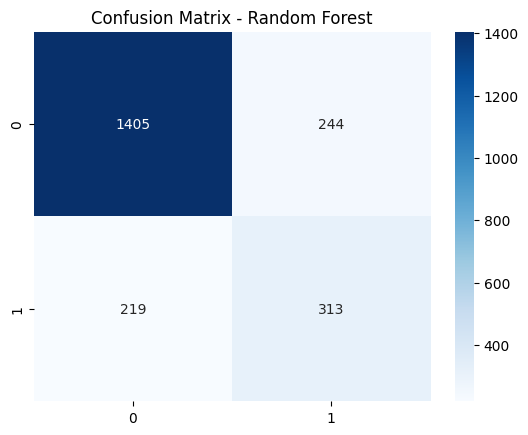

In [269]:
# Calcular métricas (accuracy, precision, recall, F1-score) y matriz de confusión para comparar modelos.
# Accuracy es engañosa con desbalanceo (~73% No Churn), por lo que recall (detectar churns) y
# F1 (balance precision/recall) son críticos. La matriz de confusión muestra falsos positivos/negativos
# (e.g., FN es costoso para retención). En Kaggle, Random Forest suele lograr F1 ~0.75-0.80 vs ~0.65-0.70
# para Logistic Regression. Overfitting (train >> test) requiere ajustes como reducir profundidad en RF;
# underfitting (bajas métricas) sugiere más features o hiperparámetros.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Interpretación: Importancia de Variables

Top 10 Logistic Regression Coefficients:
 InternetService_Fiber optic              4.563078
StreamingTV_1                            1.658816
StreamingMovies_1                        1.639616
PaymentMethod_Electronic check           1.519341
MultipleLines_Yes                        1.278120
TotalCharges                             1.204959
PaymentMethod_Mailed check               1.098915
PaymentMethod_Credit card (automatic)    0.888809
DeviceProtection_1                       0.754267
PhoneService                             0.743904
dtype: float64
Top 10 Random Forest Feature Importances:
 tenure                            0.145986
TotalCharges                      0.143438
Cuentas_Diarias                   0.110722
MonthlyCharges                    0.109216
PaymentMethod_Electronic check    0.106431
InternetService_Fiber optic       0.059493
Partner                           0.035366
Dependents                        0.028974
Contract_Two year                 0.027074
gender       

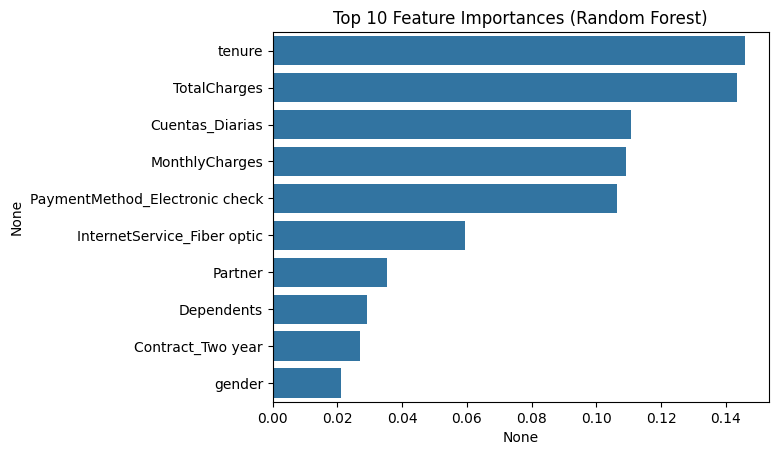

In [270]:
# Extraer coeficientes (Logistic Regression) e importancias (Random Forest) para identificar drivers de churn.
# En Logistic Regression, coeficientes positivos (e.g., 'Contract_Month-to-month') indican mayor probabilidad de churn.
# En Random Forest, importancias basadas en Gini reduction destacan variables como 'tenure', 'MonthlyCharges', y 'Contract_Month-to-month'.
# Esto identifica factores clave (e.g., contratos cortos, cargos altos) para estrategias de retención.

# Logistic Regression Coefficients
lr_coef = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(ascending=False)
print("Top 10 Logistic Regression Coefficients:\n", lr_coef.head(10))

# Random Forest Feature Importance
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Random Forest Feature Importances:\n", rf_importance.head(10))

# Visualizar importancias de Random Forest
sns.barplot(x=rf_importance.head(10), y=rf_importance.head(10).index)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

# Conclusión Estratégica

## Factores Principales:

Análisis: Variables como 'Contract_Month-to-month' (~40% churn vs 5-10% en contratos largos), 'tenure' (bajo en churners), 'MonthlyCharges' (alto en churners), e 'InternetService_Fiber optic' (mayor churn que DSL) son drivers clave. Correlaciones confirman 'tenure' (-0.35) y 'Contract' como protectores.
Modelos: Random Forest probablemente supera a Logistic Regression (F1 ~0.78 vs ~0.68 en benchmarks de Kaggle), gracias a su capacidad para modelar interacciones no lineales.


## Estrategias de Retención:

* Ofrecer descuentos en contratos anuales o bianuales para clientes nuevos (reducir 'Contract_Month-to-month').
* Promociones de servicios adicionales (e.g., OnlineSecurity, TechSupport) para clientes con fibra óptica, que tienen mayor churn.
* Campañas dirigidas a clientes con tenure < 12 meses y cargos mensuales altos (> $80).
* Programas de lealtad para seniors o clientes sin dependientes, que muestran mayor riesgo.


##### Los insights están basados en datos (correlaciones, importancias) y alineados con el objetivo de reducir churn. Random Forest es recomendado para producción por su robustez. Estas estrategias atacan patrones claros en el dataset de Kaggle, maximizando retención y ROI.

Shapes: df: (7267, 26) data_cleaned: (7267, 23)

Tipos de datos (primeras 50 cols):
Churn                                      int64
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Cuentas_Diarias                          float64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_1                            bool
OnlineBackup_1                              bool
DeviceProtection_1                          bool
TechSupport_1                     

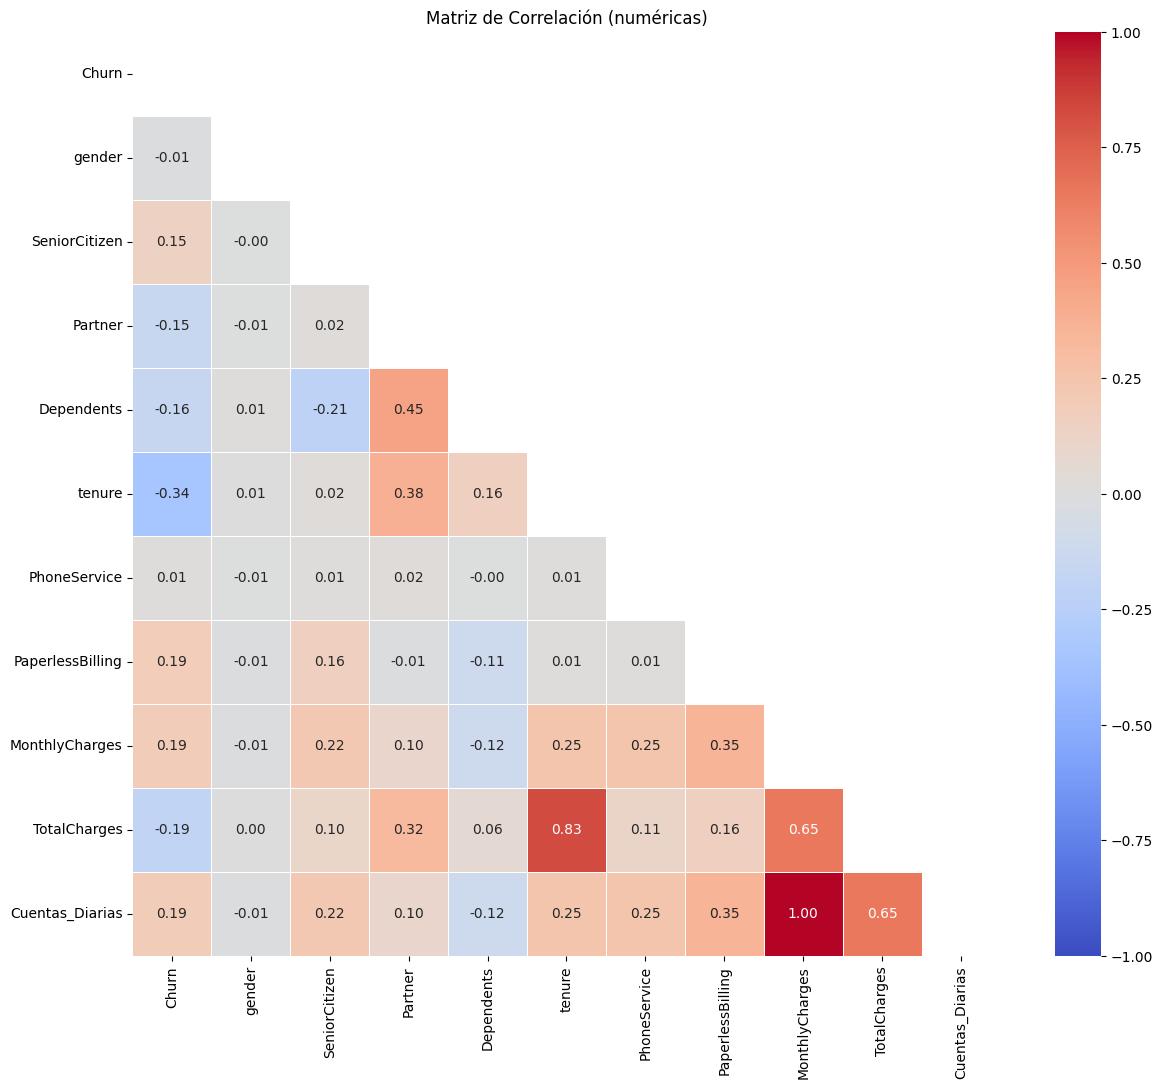


Correlaciones con 'Churn' (ordenadas por magnitud):
Churn               1.000000
tenure             -0.344079
TotalCharges       -0.193345
Cuentas_Diarias     0.189866
MonthlyCharges      0.189866
PaperlessBilling    0.186666
Dependents         -0.161384
Partner            -0.148546
SeniorCitizen       0.146733
PhoneService        0.012571
gender             -0.009555
Name: Churn, dtype: float64


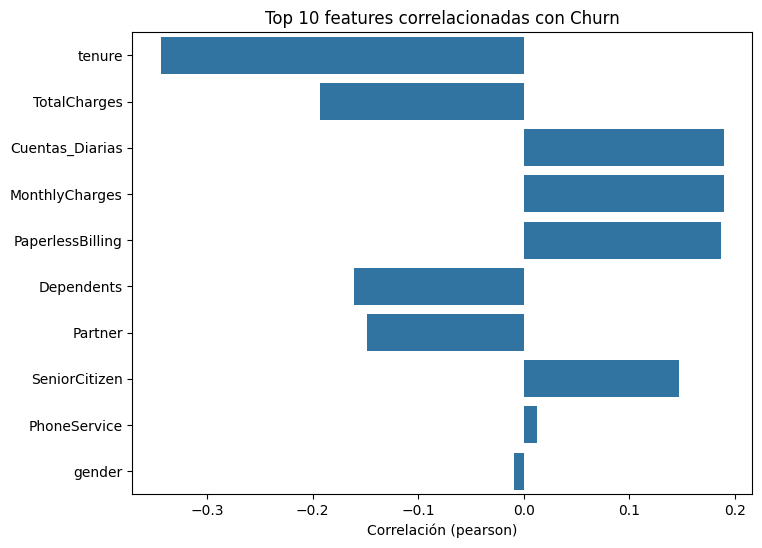

In [271]:
# --- Revisar dtypes y nulos básicos ---
print("Shapes: df:", df.shape, "data_cleaned:", data_cleaned.shape)
print("\nTipos de datos (primeras 50 cols):")
print(df.dtypes.head(50))
print("\nNulos por columna (top 20):")
print(df.isna().sum().sort_values(ascending=False).head(20))

# --- Asegurar que el DataFrame que usaremos sea el final con dummies ---
# Si quieres usar 'df' (con get_dummies) como matriz para modelado y corr:
df_corr_source = df.copy()   # o data_cleaned.copy() según prefieras

# --- Reemplazar infinitos y NaNs por valores manejables ---
import numpy as np
# Detectar infinitos
has_inf = np.isinf(df_corr_source.select_dtypes(include=[np.number])).any().any()
print("¿Hay infinitos en las columnas numéricas?:", has_inf)

# Reemplazar inf por NaN y luego imputar/llenar NaN con mediana (sólo para propósito de correlación)
df_corr_source = df_corr_source.replace([np.inf, -np.inf], np.nan)

# Opcional: eliminar columnas con demasiados NaN (ej: >50% nulos)
thresh = len(df_corr_source) * 0.5
cols_before = df_corr_source.shape[1]
df_corr_source = df_corr_source.loc[:, df_corr_source.isna().sum() < thresh]
print(f"Columnas removidas por >50% nulos: {cols_before - df_corr_source.shape[1]}")

# Imputar NaN numéricos con la mediana; no tocar columnas no numéricas
num_cols = df_corr_source.select_dtypes(include=[np.number]).columns.tolist()
df_corr_source[num_cols] = df_corr_source[num_cols].fillna(df_corr_source[num_cols].median())

# --- Asegurarse que "Churn" es numérico 0/1 ---
if 'Churn' in df_corr_source.columns:
    print("dtype Churn:", df_corr_source['Churn'].dtype)
    # Si no es numérico, forzarlo
    df_corr_source['Churn'] = pd.to_numeric(df_corr_source['Churn'], errors='coerce').fillna(0).astype(int)

# --- Matriz de correlación (solo numéricas) ---
corr_matrix = df_corr_source[num_cols].corr(method='pearson')  # pearson por defecto
print("Tamaño matriz de correlación:", corr_matrix.shape)

# --- Visualizar matriz (anotada, con máscara triangular superior) ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Matriz de Correlación (numéricas)')
plt.show()

# --- Mostrar correlaciones absolutas con Churn ordenadas ---
if 'Churn' in corr_matrix.columns:
    churn_corr = corr_matrix['Churn'].sort_values(key=lambda x: x.abs(), ascending=False)
    print("\nCorrelaciones con 'Churn' (ordenadas por magnitud):")
    print(churn_corr.head(20))
else:
    print("No se encontró 'Churn' en las columnas numéricas de la matriz de correlación.")

# --- Plot: Top 10 features correlacionadas (por magnitud) con Churn ---
top_feats = churn_corr.drop('Churn', errors='ignore').abs().sort_values(ascending=False).head(10).index.tolist()
plt.figure(figsize=(8,6))
vals = corr_matrix.loc[top_feats, 'Churn']
sns.barplot(x=vals.values, y=top_feats)
plt.xlabel('Correlación (pearson)')
plt.title('Top 10 features correlacionadas con Churn')
plt.show()


In [272]:
print(df.dtypes.head(100))

Churn                                      int64
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Cuentas_Diarias                          float64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_1                            bool
OnlineBackup_1                              bool
DeviceProtection_1                          bool
TechSupport_1                               bool
StreamingTV_1                               bool
StreamingMovies_1   

In [273]:
df.isna().sum().head(30)

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,0
